In [1]:
# 필요한 패키지 임포트
import gym
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


# 상태와 Q-Table값을 입력받으면 이미지를 그려주는 함수를 정의해 보자
def draw_state(state, q_table):
    img = np.zeros((401, 401, 3))
    # 배경을 그리도록 하자
    for i in range(4):
        cv2.line(img, ((i+1)*100, 0), ((i+1)*100, 400), (255, 255, 255), 1)
        cv2.line(img, (0, (i+1)*100), (400, (i+1)*100), (255, 255, 255), 1)
    # H와 G를 적어준다
    cv2.putText(img, 'H', (1*100+10, 1*100+80), cv2.FONT_HERSHEY_COMPLEX, 
                3, (255, 0, 0))
    cv2.putText(img, 'H', (3*100+12, 1*100+80), cv2.FONT_HERSHEY_COMPLEX, 
                3, (255, 0, 0))
    cv2.putText(img, 'H', (3*100+12, 2*100+80), cv2.FONT_HERSHEY_COMPLEX, 
                3, (255, 0, 0))
    cv2.putText(img, 'H', (0*100+12, 3*100+80), cv2.FONT_HERSHEY_COMPLEX, 
                3, (255, 0, 0))
    cv2.putText(img, 'G', (3*100+12, 3*100+80), cv2.FONT_HERSHEY_COMPLEX, 
                3, (0, 255, 0))
    # Agent 위치 표시
    row = state//4
    col = state%4
    cv2.circle(img, (col*100+50, row*100+50), 15, (0, 0, 255), -1)
    # Q Table 표시
    for i in range(16):
        if (i == 5 or i == 7 or i == 11 or i == 12 or i == 15):
            continue
        row = i//4
        col = i%4
        cv2.putText(img, str(round(q_table[i][0], 3)), (col*100+1, row*100+55), 
                    cv2.FONT_HERSHEY_COMPLEX, 0.3,
                    (255, 255, 255))
        cv2.putText(img, str(round(q_table[i][1], 3)), (col*100+40, row*100+90), 
                    cv2.FONT_HERSHEY_COMPLEX, 0.3,
                    (255, 255, 255))
        cv2.putText(img, str(round(q_table[i][2], 3)), (col*100+70, row*100+55), 
                    cv2.FONT_HERSHEY_COMPLEX, 0.3,
                    (255, 255, 255))
        cv2.putText(img, str(round(q_table[i][3], 3)), (col*100+40, row*100+10), 
                    cv2.FONT_HERSHEY_COMPLEX, 0.3,
                    (255, 255, 255))
    return img


# 문자열을 적으면 이미지로 변경해 주는 함수를 정의해 주자
def draw_txt(txt):
    img = np.zeros((401, 401, 3))
    cv2.putText(img, txt, (10, 200), cv2.FONT_HERSHEY_COMPLEX, 1.5, (255, 255, 255))
    return img

# 파라미터를 설정해 주자
num_episode = 3000
is_video_save = True
fps = 1

3000번 시도 중 38.0번 성공!
성공률은 1.27% 입니다.


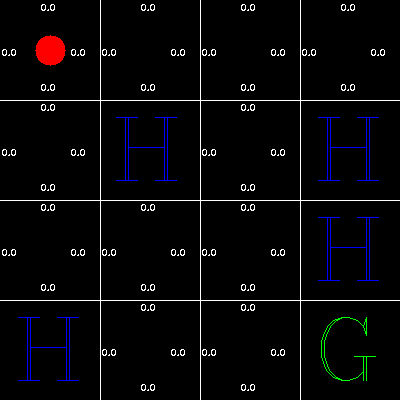

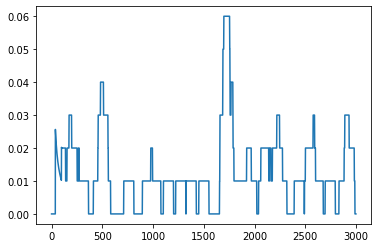

In [ ]:
# 앞서 랜덤하게 움직이는 부분을 3000 에피소드 만큼만 돌리는 것으로 동일하므로
# 이 셀의 코드는 책에서 설명하지 않는다.

# 미끄럽지 않은 환경을 만들어주자
avi_file_name = 'Q-rl-1.avi'

env = gym.make('FrozenLake-v0', is_slippery=False)
# Q-Table은 나중에 설명하겠다.
q_table = np.zeros((16, 4))
# 이미지를 동영상으로 기록해 보자
if (is_video_save):
    fcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter(avi_file_name, fcc, fps, (401, 401))
# 보상을 기록할 리스트를 정의해 주자
reward_list = []
reward_100_average = []

# 정해진 게임을 진행해보자
for epi in range(num_episode):
    if (is_video_save):
        txt = 'Episode : '+str(epi)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    d = False
    total_reward = 0
    s = env.reset()
    # 게임이 종료될 때까지 이어서 하자
    while not d:
        if (is_video_save):
            out.write(np.uint8(draw_state(s, q_table)))
        # env.action_space.sample()은 임의의 행동하나(0~3 사이의 값)을 돌려준다.
        n_s, r, d, _ = env.step(env.action_space.sample())
        total_reward = total_reward+r
        s = n_s

    reward_list.append(total_reward)

    if (is_video_save):
        out.write(np.uint8(draw_state(s, q_table)))
    if (total_reward == 1):
        txt = 'Success'
    else:
        txt = 'Fail'

    if (is_video_save):
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    # 진행상태를 보고자 한다면 아래 print함수의 주석을 풀어보자.
    # print(epi,np.average(reward_list[-100:]))
    reward_100_average.append(np.average(reward_list[-100:]))

if (is_video_save):
    txt = 'Success : '+str(np.sum(reward_list))
    for _ in range(3):
        out.write(np.uint8(draw_txt(txt)))
    out.release()

print('{}번 시도 중 {}번 성공!'.format(num_episode, np.sum(reward_list)))
print('성공률은 {}% 입니다.'.format(round(np.sum(reward_list)/num_episode*100, 2)))
cv2_imshow(draw_state(0, q_table))
plt.plot(reward_100_average)

3000번 시도 중 2774.0번 성공!
성공률은 92.47% 입니다.


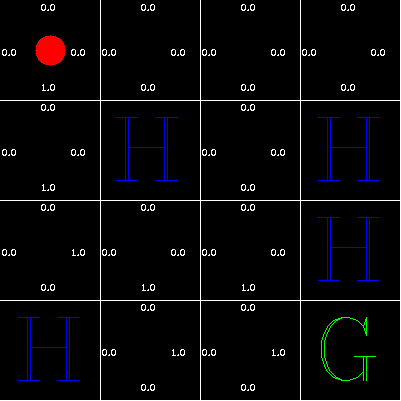

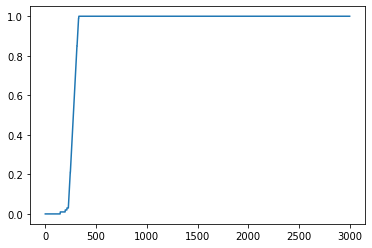

In [ ]:
avi_file_name = 'Q-rl-2.avi'

env = gym.make('FrozenLake-v0', is_slippery=False)
q_table = np.zeros((16, 4))

if (is_video_save):
    fcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter(avi_file_name, fcc, fps, (401, 401))

reward_list = []
reward_100_average = []

for epi in range(num_episode):
    if (is_video_save):
        txt = 'Episode : '+str(epi)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    d = False
    total_reward = 0
    s = env.reset()
    while not d:
        if (is_video_save):
            out.write(np.uint8(draw_state(s, q_table)))
        # 액션 4개 중 Q값이 가장 큰값을 선택한다
        # 만약 Q값이 큰 값이 여러개면 랜덤하게 선택한다.
        action = np.argmax(np.random.random((4,))*(q_table[s] == q_table[s].max()))
        n_s, r, d, _ = env.step(action)
        total_reward = total_reward+r

        # Q값을 업데이트해준다
        q_table[s][action] = r+np.max(q_table[n_s])
        s = n_s

    reward_list.append(total_reward)

    if (is_video_save):
        out.write(np.uint8(draw_state(s, q_table)))
    if (total_reward == 1):
        txt = 'Success'
    else:
        txt = 'Fail'
    if (is_video_save):
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
            # print(epi,np.average(reward_list[-100:]))
    reward_100_average.append(np.average(reward_list[-100:]))

if (is_video_save):
    txt = 'Success : '+str(np.sum(reward_list))
    for _ in range(3):
        out.write(np.uint8(draw_txt(txt)))
    out.release()

print('{}번 시도 중 {}번 성공!'.format(num_episode, np.sum(reward_list)))
print('성공률은 {}% 입니다.'.format(round(np.sum(reward_list)/num_episode*100, 2)))
cv2_imshow(draw_state(0, q_table))
plt.plot(reward_100_average)

3000번 시도 중 639.0번 성공!
성공률은 21.3% 입니다.


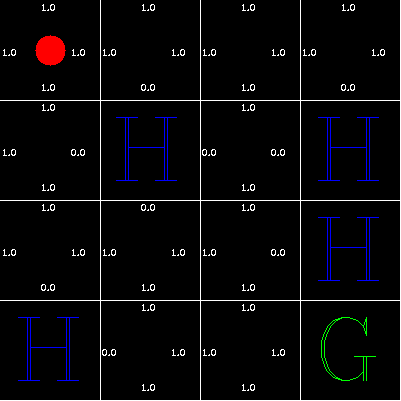

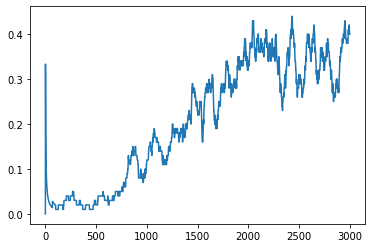

In [ ]:
avi_file_name = 'Q-rl-3.avi'

# 초반에는 랜덤하게 움직일 확률을 높이고,
# 학습이 진행될 수록 랜덤하게 움직이는 비율을 낮추어 보자
epsilon_max = 0.9
epsilon_min = 0.1
epsilon_count = 2000

epsilon = epsilon_max
epsilon_decay = epsilon_min/epsilon_max
epsilon_decay = epsilon_decay**(1./float(epsilon_count))

env = gym.make('FrozenLake-v0', is_slippery=False)
q_table = np.zeros((16, 4))

if (is_video_save):
    fcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter(avi_file_name, fcc, fps, (401, 401))

reward_list = []
reward_100_average = []

for epi in range(num_episode):
    if (is_video_save):
        txt = 'Episode : '+str(epi)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    d = False
    total_reward = 0
    s = env.reset()
    while not d:
        if (is_video_save):
            out.write(np.uint8(draw_state(s, q_table)))
        # 랜덤함수를 사용하여 일정비율로는 랜덤하게 움직이고,
        # 나머지 비율로는 이전처럼 큰 Q값을 따라 다녀보자
        if (np.random.rand()) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(np.random.random((4,))*(q_table[s] == q_table[s].max()))
        n_s, r, d, _ = env.step(action)
        total_reward = total_reward+r
        q_table[s][action] = r+np.max(q_table[n_s])
        s = n_s

    reward_list.append(total_reward)

    if (epsilon > epsilon_min):
        epsilon = epsilon*epsilon_decay

    if (is_video_save):
        out.write(np.uint8(draw_state(s, q_table)))

    if (total_reward == 1):
        txt = 'Success'
    else:
        txt = 'Fail'
    if (is_video_save):
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    # print(epi,np.average(reward_list[-100:]))
    reward_100_average.append(np.average(reward_list[-100:]))

if (is_video_save):
    txt = 'Success : '+str(np.sum(reward_list))
    for _ in range(3):
        out.write(np.uint8(draw_txt(txt)))
    out.release()

print('{}번 시도 중 {}번 성공!'.format(num_episode, np.sum(reward_list)))
print('성공률은 {}% 입니다.'.format(round(np.sum(reward_list)/num_episode*100, 2)))
cv2_imshow(draw_state(0, q_table))
plt.plot(reward_100_average)

3000번 시도 중 2072.0번 성공!
성공률은 69.07% 입니다.


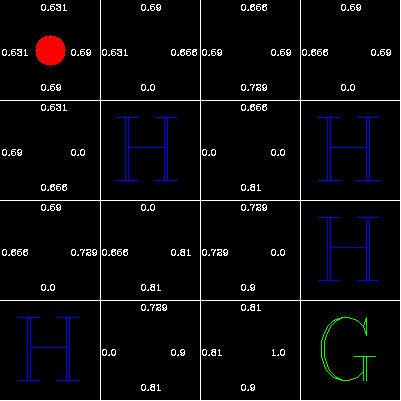

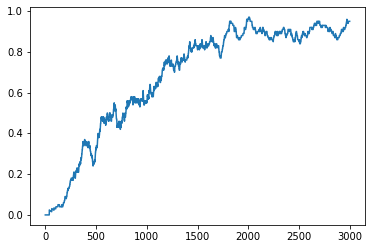

In [ ]:
avi_file_name = 'Q-rl-4.avi'

epsilon_max = 0.9
epsilon_min = 0.1
epsilon_count = 2000

# 할인률은 0.9로 하자
discount_rate = 0.9

epsilon = epsilon_max
epsilon_decay = epsilon_min/epsilon_max
epsilon_decay = epsilon_decay**(1./float(epsilon_count))

env = gym.make('FrozenLake-v0', is_slippery=False)
q_table = np.zeros((16, 4))

if (is_video_save):
    fcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter(avi_file_name, fcc, fps, (401, 401))

reward_list = []
reward_100_average = []

for epi in range(num_episode):
    if (is_video_save):
        txt = 'Episode : '+str(epi)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    d = False
    total_reward = 0
    s = env.reset()
    while not d:
        if (is_video_save):
            out.write(np.uint8(draw_state(s, q_table)))
        if (np.random.rand()) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(np.random.random((4,))*(q_table[s] == q_table[s].max()))
        n_s, r, d, _ = env.step(action)
        total_reward = total_reward+r

        # Q값을 업데이트 해줄때 할인율을 곱해서 해주자.
        q_table[s][action] = r+discount_rate*np.max(q_table[n_s])
        s = n_s

    reward_list.append(total_reward)

    if (epsilon > epsilon_min):
        epsilon = epsilon*epsilon_decay

    if (is_video_save):
        out.write(np.uint8(draw_state(s, q_table)))

    if (total_reward == 1):
        txt = 'Success'
    else:
        txt = 'Fail'
    if (is_video_save):
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    # print(epi,np.average(reward_list[-100:]))
    reward_100_average.append(np.average(reward_list[-100:]))

if (is_video_save):
    txt = 'Success : '+str(np.sum(reward_list))
    for _ in range(3):
        out.write(np.uint8(draw_txt(txt)))
    out.release()

print('{}번 시도 중 {}번 성공!'.format(num_episode, np.sum(reward_list)))
print('성공률은 {}% 입니다.'.format(round(np.sum(reward_list)/num_episode*100, 2)))
cv2_imshow(draw_state(0, q_table))
plt.plot(reward_100_average)

3000번 시도 중 92.0번 성공!
성공률은 3.07% 입니다.


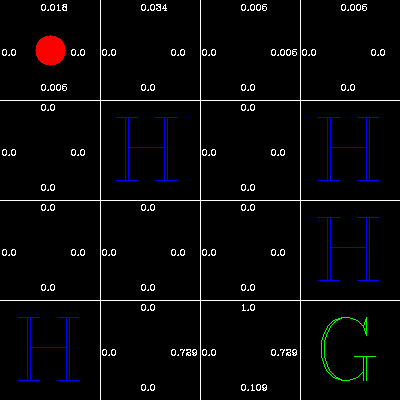

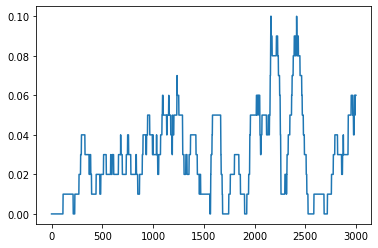

In [ ]:
avi_file_name = 'Q-rl-5.avi'

epsilon_max = 0.9
epsilon_min = 0.1
epsilon_count = 2000

# 할인률은 0.9로 하자
discount_rate = 0.9

epsilon = epsilon_max
epsilon_decay = epsilon_min/epsilon_max
epsilon_decay = epsilon_decay**(1./float(epsilon_count))

env = gym.make('FrozenLake-v0', is_slippery=True)
q_table = np.zeros((16, 4))

if (is_video_save):
    fcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter(avi_file_name, fcc, fps, (401, 401))

reward_list = []
reward_100_average = []

for epi in range(num_episode):
    if (is_video_save):
        txt = 'Episode : '+str(epi)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    d = False
    total_reward = 0
    s = env.reset()
    while not d:
        if (is_video_save):
            out.write(np.uint8(draw_state(s, q_table)))
        if (np.random.rand()) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(np.random.random((4,))*(q_table[s] == q_table[s].max()))
        n_s, r, d, _ = env.step(action)
        total_reward = total_reward+r

        # Q값을 업데이트 해줄때 할인율을 곱해서 해주자.
        q_table[s][action] = r+discount_rate*np.max(q_table[n_s])
        s = n_s

    reward_list.append(total_reward)

    if (epsilon > epsilon_min):
        epsilon = epsilon*epsilon_decay

    if (is_video_save):
        out.write(np.uint8(draw_state(s, q_table)))

    if (total_reward == 1):
        txt = 'Success'
    else:
        txt = 'Fail'
    if (is_video_save):
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    # print(epi,np.average(reward_list[-100:]))
    reward_100_average.append(np.average(reward_list[-100:]))

if (is_video_save):
    txt = 'Success : '+str(np.sum(reward_list))
    for _ in range(3):
        out.write(np.uint8(draw_txt(txt)))
    out.release()

print('{}번 시도 중 {}번 성공!'.format(num_episode, np.sum(reward_list)))
print('성공률은 {}% 입니다.'.format(round(np.sum(reward_list)/num_episode*100, 2)))
cv2_imshow(draw_state(0, q_table))
plt.plot(reward_100_average)

30000번 시도 중 7070.0번 성공!
성공률은 23.57% 입니다.


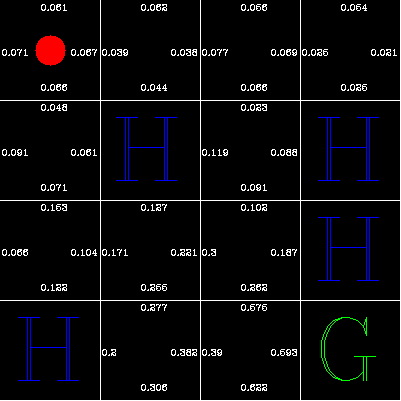

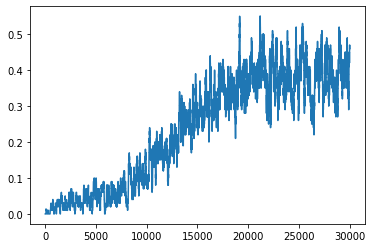

In [ ]:
avi_file_name = 'Q-rl-6.avi'
# 시간이 오래 걸리니 동영상은 저장하지 않는다.
is_video_save = False
# 환경이 어려우니 에피소드 수를 10배정도 늘리자.
num_episode = 30000

epsilon_max = 0.9
epsilon_min = 0.1
epsilon_count = 20000

# 맨토의 말은 단 1%만 듣자
learning_rate = 0.01
discount_rate = 0.9

epsilon = epsilon_max
epsilon_decay = epsilon_min/epsilon_max
epsilon_decay = epsilon_decay**(1./float(epsilon_count))

env = gym.make('FrozenLake-v0', is_slippery=True)
q_table = np.zeros((16, 4))

if (is_video_save):
    fcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter(avi_file_name, fcc, fps, (401, 401))

reward_list = []
reward_100_average = []

for epi in range(num_episode):
    if (is_video_save):
        txt = 'Episode : '+str(epi)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    d = False
    total_reward = 0
    s = env.reset()
    while not d:
        if (is_video_save):
            out.write(np.uint8(draw_state(s, q_table)))
        if (np.random.rand()) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(np.random.random((4,))*(q_table[s] == q_table[s].max()))
        n_s, r, d, _ = env.step(action)
        total_reward = total_reward+r
        # 멘토의 의견은 1% 나머지는 내가 가지고 있는 값 99%를 유지해 가며 
        # 조금씩 업데이트해주자
        q_table[s][action] = (1-learning_rate)*q_table[s][action] + \
        learning_rate*(r+discount_rate*np.max(q_table[n_s]))
        s = n_s

    reward_list.append(total_reward)

    if (epsilon > epsilon_min):
        epsilon = epsilon*epsilon_decay

    if (is_video_save):
        out.write(np.uint8(draw_state(s, q_table)))

    if (total_reward == 1):
        txt = 'Success'
    else:
        txt = 'Fail'
    if (is_video_save):
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    # print(epi,np.average(reward_list[-100:]))
    reward_100_average.append(np.average(reward_list[-100:]))

if (is_video_save):
    txt = 'Success : '+str(np.sum(reward_list))
    for _ in range(3):
        out.write(np.uint8(draw_txt(txt)))
    out.release()

print('{}번 시도 중 {}번 성공!'.format(num_episode, np.sum(reward_list)))
print('성공률은 {}% 입니다.'.format(round(np.sum(reward_list)/num_episode*100, 2)))
cv2_imshow(draw_state(0, q_table))
plt.plot(reward_100_average)